# Word2Vec Analysis Summary

I utilized Word2Vec, a popular technique, to represent words as vectors in high-dimensional space, capturing semantic relationships between them. In this analysis, I applied Word2Vec to analyze the lyrical content of a dataset containing song lyrics.

I preprocessed the dataset containing song lyrics to clean and prepare the text data for analysis. Afterwards, I trained a Word2Vec model on the preprocessed lyrics data using the Gensim library.

The Word2Vec model learned to represent each word in the dataset as a dense vector in a high-dimensional space. To visualize the word embeddings in a 2D space, I applied Principal Component Analysis (PCA) to reduce the dimensionality of the word vectors.

**Scatter Plot Visualization**:
   I visualized the reduced word embeddings using a scatter plot.
   Each point on the plot represents a word, with its position determined by the two principal components obtained from PCA.
   Words with similar meanings or contexts are expected to cluster together on the plot.

In [31]:
import pandas as pd
from gensim.parsing.preprocessing import preprocess_string
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

df = pd.read_csv("../data/cleaned_data.csv")

In [5]:
# Preprocessing in the lyrics column
def preprocess_text(text):
    return preprocess_string(text)

df['clean_lyrics'] = df['lyrics'].apply(preprocess_text)

In [6]:
# Training the Word2Vec model
model = Word2Vec(sentences=df['clean_lyrics'], vector_size=100, window=5, min_count=1, sg=0)

In [7]:
# Obtaining my word vectors
word_vectors = model.wv

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors.vectors)

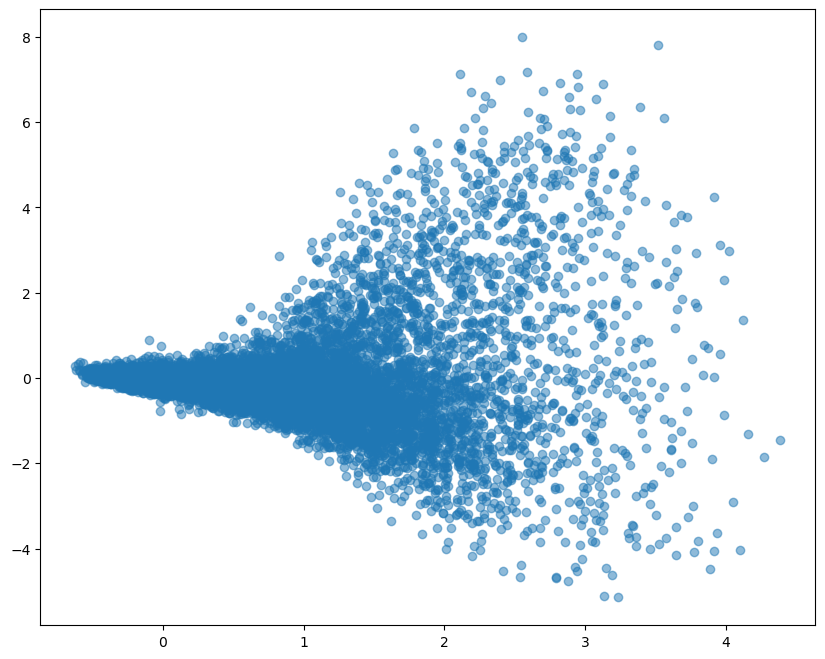

In [9]:
# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

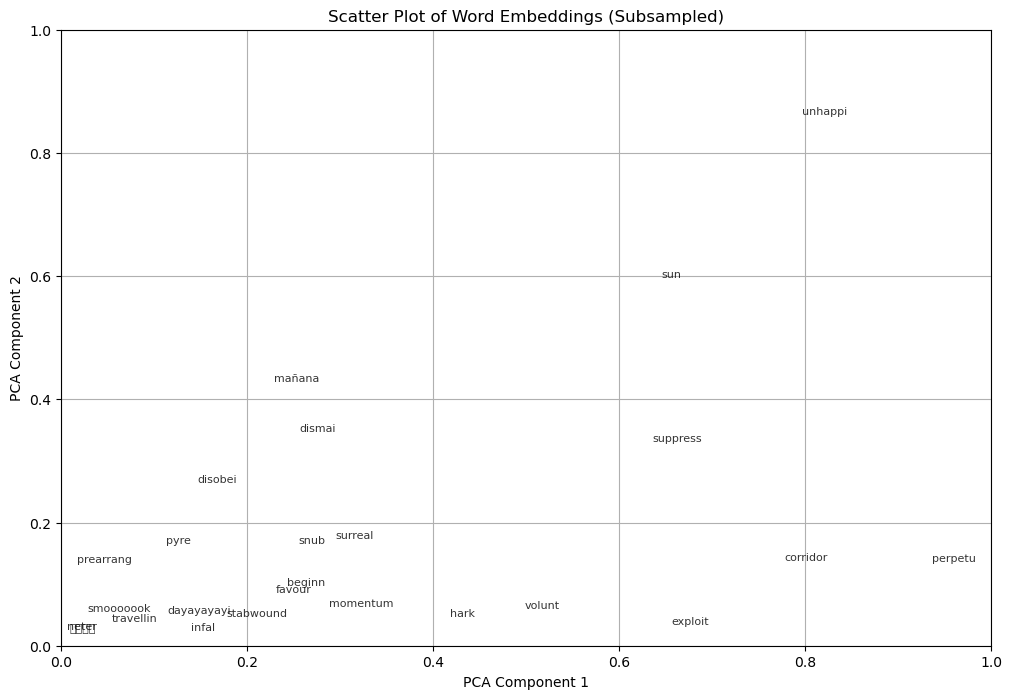

In [30]:
# Subsample the words for annotation, using the random library to limit the sheer amount of words that would appear from this dataset
subsample_indices = random.sample(range(len(word_vectors.index_to_key)), k=500)

# Annotating each point with the corresponding word
for i in subsample_indices:
    word = word_vectors.index_to_key[i]
    plt.annotate(word, 
                 xy=(pca_result[i, 0], pca_result[i, 1]), 
                 xytext=(0, 10)
                 textcoords='offset points', 
                 fontsize=8
                 alpha=0.8)
plt.figure(figsize=(12, 8))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of Word Embeddings (Subsampled)')
plt.grid(True)